# Summary

I initailly investigated whether the rate of covid infection rates has a correlation with different metrics of the World Happiness Dataset for different contries. 

The Covid Datasets used here are published by the WHO among others, and are downloaded from
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases?force_layout=desktop

The World Happiness Datasets use data from the Gallup World Pollare downloaded from 
https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

Firstly, I organised the Covid Infection Dataset and identified the maximum rate of infections for different countries. Then I joined it with the World Happiness Dataset. Finally, I identified any correlations that might be present. It appears that there is a relationship between the variables - countries that have a higher world happiness score also have a higher rate of covid infections. 

I am aware that different countries have different approaches to testing and recording Covid cases so I then repeated the investigation using Covid Death data, instead of Covid Infection Rates data to see if the same relationships are apparent. They are. It appears that the higher a country scores on the world happiness measures, the higher the covid death rate within that country. It should be noted that the correlations are not particularly strong though.

I highly doubt that the happiness scores are a result of, or cause of, Covid infection or death rates, so I assume that they are linked by another variable. For further investigation at a later date: - population size - population density - vaccination rates - ages of the population - covid strategies (eg. lockdown) - wealth

### Thank you for reading!

# Importing Required Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

print('Done')

Done


# Organising the Covid Infection Rates Dataset

Please note that I am starting with the Covid Infection Rates Dataset. There is also a Dataset for Covid Deaths, which may be useful later. 

In [3]:
Covid_Infection_Rates = pd.read_csv(r"C:\Users\Alistair\Desktop\Portfolio\Covid 19 Happiness Python\Data_Time_Series_Covid19_Confirmed_Global_Cases.csv")
Covid_Infection_Rates.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,4236,4259,4259,4259,4283,4283,4283,4283,4283,4486
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,5460042,5480305,5514207,5556239,5606745,5654408,5674428,5694930,5739326,5820536
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,344481,344540,344649,344737,344826,344930,344980,345007,345036,345126
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,2942,3186,3311,3559,3564,4010,4919,5323,5323,7054
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,137011,143042,154191,166373,166373,187504,228307,249064,272160,307214


I notice that some Countries are listed multiple times (due to the number of Covid cases being reported separately from different regions). In order to analyse this data, I need to ensure that there is one row per country. As part of this process, the total reported cases from each region within a country need to be added together so that we have an overall total number of cases for that country. 

In [4]:
Covid_Infection_Rates_Aggregated = Covid_Infection_Rates.groupby("Country/Region").sum()
Covid_Infection_Rates_Aggregated.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,...,4236,4259,4259,4259,4283,4283,4283,4283,4283,4486
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,...,5460042,5480305,5514207,5556239,5606745,5654408,5674428,5694930,5739326,5820536
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,...,344481,344540,344649,344737,344826,344930,344980,345007,345036,345126
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,...,310478,322275,339953,361322,368596,402949,462955,492563,537308,608803


As you can see, there is quite a difference in the rate of infections for different countries. I have chosen a selection below to illustrate the differences more clearly. At this point, I will also drop the Latitude and Longitude Columns as they are not necessary for the analysis and will interfere with calculations if they are left. 

In [5]:
Covid_Infection_Rates_Aggregated.drop(["Lat","Long"],axis=1,inplace=True)

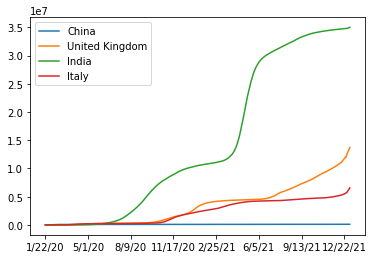

In [6]:
Covid_Infection_Rates_Aggregated.loc['China'].plot()
Covid_Infection_Rates_Aggregated.loc['United Kingdom'].plot()
Covid_Infection_Rates_Aggregated.loc['India'].plot()
Covid_Infection_Rates_Aggregated.loc['Italy'].plot()
plt.legend()

There are several potential reasons for the different rates of infection for the countries, including:
 - different population sizes or densities
 - different covid strategies (eg. lockdowns)
 - different vaccination rates
 
The above factors is something I might come back to another time, but I do not intend to investigate it here. 


Now I will identify the fastest rate of growth of infection rates for each country using the first derivative (to identify the rate of change) and a loop. 

In [7]:
countries = list(Covid_Infection_Rates_Aggregated.index)

Max_Infection_Rates = []

for country in countries :
    Max_Infection_Rates.append(Covid_Infection_Rates_Aggregated.loc[country].diff().max())

Covid_Infection_Rates_Aggregated['Max Infection Rate'] = Max_Infection_Rates  

Covid_Infection_Rates_Aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,Max Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,157967,157998,158037,158056,158084,158107,158189,158183,158205,3243.0
Albania,0,0,0,0,0,0,0,0,0,0,...,207709,208352,208899,208899,210224,210224,210885,210885,212021,1325.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,216930,217265,217647,218037,218432,218818,219159,219532,219953,1927.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,22332,22540,22823,23122,23740,23740,23740,24502,24802,762.0
Angola,0,0,0,0,0,0,0,0,0,0,...,71752,76787,78475,79871,81593,82398,82920,83764,84666,5035.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,4259,4259,4259,4283,4283,4283,4283,4283,4486,299.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,5480305,5514207,5556239,5606745,5654408,5674428,5694930,5739326,5820536,81210.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,344540,344649,344737,344826,344930,344980,345007,345036,345126,2603.0
Australia,0,0,0,0,4,5,5,6,9,9,...,322275,339953,361322,368596,402949,462955,492563,537308,608803,71495.0


We only want the final column of this DataFrame - the column just created 'Max Infection Rate'.

In [8]:
Max_Infection = pd.DataFrame(Covid_Infection_Rates_Aggregated['Max Infection Rate'])
Max_Infection.head(10)

,Max Infection Rate
Country/Region,
Afghanistan,3243.0
Albania,1325.0
Algeria,1927.0
Andorra,762.0
Angola,5035.0
Antigua and Barbuda,299.0
Argentina,81210.0
Armenia,2603.0
Australia,71495.0


# World Happiness Data

In [9]:
World_Happiness_2019 = pd.read_csv(r"C:\Users\Alistair\Desktop\Portfolio\Covid 19 Happiness Python\Data_World_Happiness_2019.csv")
World_Happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


This is the data from 2019, which is the most recent data I have available. The Covid data begins in January 2020.

Unlike the Covid data, the World Happiness Data only has one row per country, so aggregation is not necessary.

I am tempted to remove some columns at this point, as I do not anticipate that they will have a correlation with Covid Infection Rates (eg. 'Overall rank'), but it is important to keep an open mind when conducting analysis, so I intend to leave the data intact for now. 

# Joining World Happiness Data And Covid Infection Rates Data

Firstly, I will alter the World Happiness Data index to be the Country, so that it matches the Covid data I am working with.

In [10]:
World_Happiness_2019.set_index(['Country or region'],inplace=True)
World_Happiness_2019.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Now I will check the shape of both sets of data before joining them.

In [11]:
Max_Infection.shape

(196, 1)

In [12]:
World_Happiness_2019.shape

(156, 8)

So it appears that there are different numbers of countries included in each set of data. Therefore I will join the tables using an inner join. 

In [13]:
Max_Infection_And_Happiness_Data = World_Happiness_2019.join(Max_Infection,how="inner")
Max_Infection_And_Happiness_Data.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Max Infection Rate
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,17047.0
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,41204.0
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,10867.0
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,4011.0
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,23783.0


Now that I have the data combined and grouped I can begin to investigate. 

# Analysis

Let's have a look at the correlation matrix to see which variables correlate most strongly...

In [14]:
Max_Infection_And_Happiness_Data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Max Infection Rate
Overall rank,1.000000,-0.989127,-0.803665,-0.776393,-0.806767,-0.568654,-0.070804,-0.388395,-0.136126
Score,-0.989127,1.000000,0.795413,0.784094,0.801891,0.585119,0.097775,0.419293,0.129557
GDP per capita,-0.803665,0.795413,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759,0.204108
Social support,-0.776393,0.784094,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333,0.141449
Healthy life expectancy,-0.806767,0.801891,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566,0.193222
Freedom to make life choices,-0.568654,0.585119,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845,-0.021572
Generosity,-0.070804,0.097775,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430,-0.044998
Perceptions of corruption,-0.388395,0.419293,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000,0.063322
Max Infection Rate,-0.136126,0.129557,0.204108,0.141449,0.193222,-0.021572,-0.044998,0.063322,1.000000


The very strong negative correlation between 'Overall rank' and 'Score' is quite interesting. It is worth remembering that the rank is based on the score, so a very high correlation is to be expected (I am surprised that it is not higher acutally - I might look into the reasons why it is not at some other time). The reason it is negative correlation is because a highest score means rank 1.

I am interested in the final column - which Happiness Data variables correlated to the Max Infection Rate in the last column. 

There doesn't appear to be a strong correlation with any of these but lets visualise one of these anyway.

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rate'>

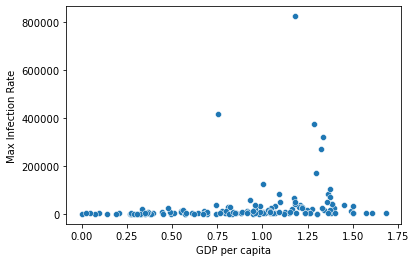

In [19]:
x = Max_Infection_And_Happiness_Data['GDP per capita']
y = Max_Infection_And_Happiness_Data['Max Infection Rate']
sns.scatterplot(x,y)



The points are grouped quite closely along the bottom axis, so I will change the scale on the y axis to try and get a clearer view.

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rate'>

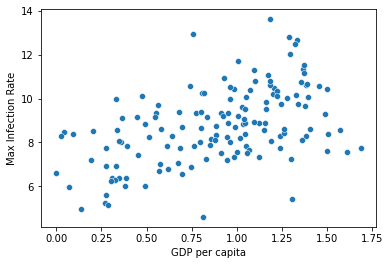

In [21]:
x = Max_Infection_And_Happiness_Data['GDP per capita']
y = Max_Infection_And_Happiness_Data['Max Infection Rate']
sns.scatterplot(x,np.log(y))

Since there is a clearer indication of correlation here, I will add a line.

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rate'>

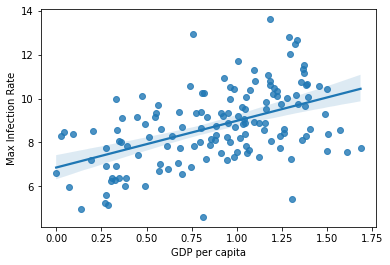

In [22]:
sns.regplot(x,np.log(y))

Now I will repeat this with the other variables.

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max Infection Rate'>

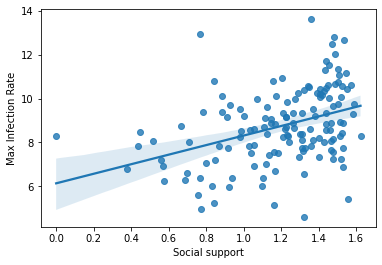

In [25]:
x = Max_Infection_And_Happiness_Data['Social support']
y = Max_Infection_And_Happiness_Data['Max Infection Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max Infection Rate'>

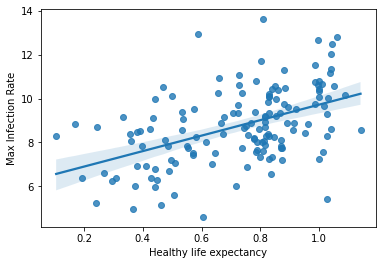

In [26]:
x = Max_Infection_And_Happiness_Data['Healthy life expectancy']
y = Max_Infection_And_Happiness_Data['Max Infection Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max Infection Rate'>

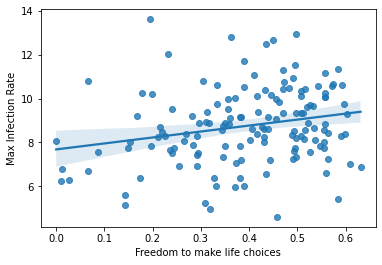

In [27]:
x = Max_Infection_And_Happiness_Data['Freedom to make life choices']
y = Max_Infection_And_Happiness_Data['Max Infection Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Generosity', ylabel='Max Infection Rate'>

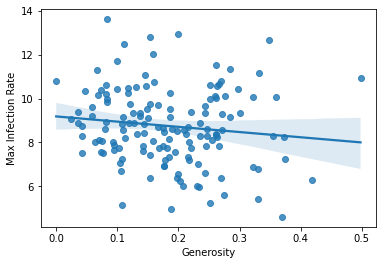

In [28]:
x = Max_Infection_And_Happiness_Data['Generosity']
y = Max_Infection_And_Happiness_Data['Max Infection Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Max Infection Rate'>

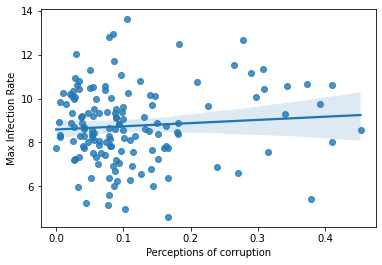

In [30]:
x = Max_Infection_And_Happiness_Data['Perceptions of corruption']
y = Max_Infection_And_Happiness_Data['Max Infection Rate']
sns.regplot(x,np.log(y))

Some of these have surprised me. 

As stated in the readme file for this project, it is based on a guided project from Coursera. In that guided project, we were advised to drop the last two of these ('Perceptions of corruption', and 'Generosity') from the data before creating the visualisations. I decided to keep them in though, since no compelling reasons were given for dropping them, and it is important to consider all data. This was a good decision and they show a slightly different picture from the first four.

The overall findings seem to be that there is a positive correlation between world happiness scores and covid infection rates. Despite the final two graphs making things less clear, there does seem to be a relationship between the variables - it appears that the higher a country scores on the world happiness measures, the higher the covid infection rate within that country. 

This is very interesting. 

However, there are very different approaches to Covid testing and recording worldwide, so I will now repeat some of this analysis with data on covid deaths (which, i would argue is a more reliable figure), to see if the same correlations occur. 

# Further Analysis - Covid Death Rates

In [33]:
# import the data
Covid_Death_Rates = pd.read_csv(r"C:\Users\Alistair\Desktop\Portfolio\Covid 19 Happiness Python\Data_Time_Series_Covid19_Deaths_Global.csv")

In [34]:
# Aggregate the data so we have one row per country
Covid_Death_Rates_Aggregated = Covid_Infection_Rates.groupby("Country/Region").sum()

# Drop lat and Long
Covid_Death_Rates_Aggregated.drop(["Lat","Long"],axis=1,inplace=True)

Covid_Death_Rates_Aggregated.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205
Albania,0,0,0,0,0,0,0,0,0,0,...,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021
Algeria,0,0,0,0,0,0,0,0,0,0,...,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953
Andorra,0,0,0,0,0,0,0,0,0,0,...,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802
Angola,0,0,0,0,0,0,0,0,0,0,...,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666


In [36]:
# calculating and appending the maximum death rate for each country

countries = list(Covid_Death_Rates_Aggregated.index)

Max_Death_Rates = []

for country in countries :
    Max_Death_Rates.append(Covid_Death_Rates_Aggregated.loc[country].diff().max())

Covid_Death_Rates_Aggregated['Max Death Rate'] = Max_Death_Rates  

# keeping only the max death rate column
Max_Death = pd.DataFrame(Covid_Death_Rates_Aggregated['Max Death Rate'])
Max_Death.head(10)

,Max Death Rate
Country/Region,
Afghanistan,3243.0
Albania,1325.0
Algeria,1927.0
Andorra,762.0
Angola,5035.0
Antigua and Barbuda,299.0
Argentina,81210.0
Armenia,2603.0
Australia,71495.0


In [37]:
# joining the max death rate to the world happiness scores
Max_Death_And_Happiness_Data = World_Happiness_2019.join(Max_Death,how="inner")
Max_Death_And_Happiness_Data.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Max Death Rate
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,17047.0
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,41204.0
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,10867.0
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,4011.0
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,23783.0


In [38]:
Max_Infection_And_Happiness_Data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Max Infection Rate
Overall rank,1.000000,-0.989127,-0.803665,-0.776393,-0.806767,-0.568654,-0.070804,-0.388395,-0.136126
Score,-0.989127,1.000000,0.795413,0.784094,0.801891,0.585119,0.097775,0.419293,0.129557
GDP per capita,-0.803665,0.795413,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759,0.204108
Social support,-0.776393,0.784094,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333,0.141449
Healthy life expectancy,-0.806767,0.801891,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566,0.193222
Freedom to make life choices,-0.568654,0.585119,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845,-0.021572
Generosity,-0.070804,0.097775,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430,-0.044998
Perceptions of corruption,-0.388395,0.419293,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000,0.063322
Max Infection Rate,-0.136126,0.129557,0.204108,0.141449,0.193222,-0.021572,-0.044998,0.063322,1.000000


Now I will produce the same visualisations as before, but using the Covid Death data, rather than the Covid Infection data. 

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Death Rate'>

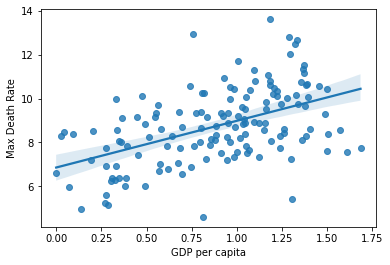

In [41]:
x = Max_Death_And_Happiness_Data['GDP per capita']
y = Max_Death_And_Happiness_Data['Max Death Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max Death Rate'>

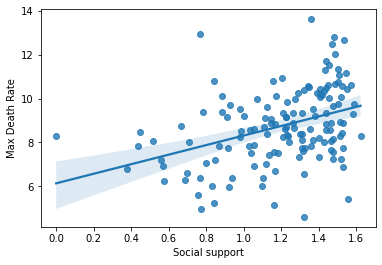

In [42]:
x = Max_Death_And_Happiness_Data['Social support']
y = Max_Death_And_Happiness_Data['Max Death Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max Death Rate'>

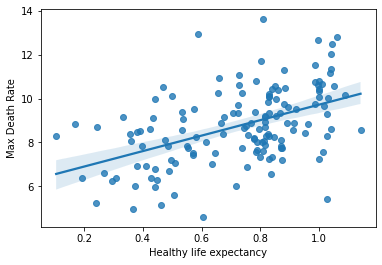

In [43]:
x = Max_Death_And_Happiness_Data['Healthy life expectancy']
y = Max_Death_And_Happiness_Data['Max Death Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max Death Rate'>

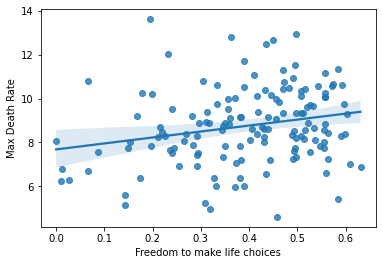

In [44]:
x = Max_Death_And_Happiness_Data['Freedom to make life choices']
y = Max_Death_And_Happiness_Data['Max Death Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Generosity', ylabel='Max Death Rate'>

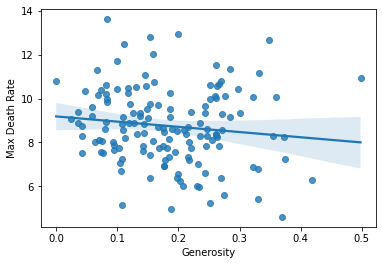

In [45]:
x = Max_Death_And_Happiness_Data['Generosity']
y = Max_Death_And_Happiness_Data['Max Death Rate']
sns.regplot(x,np.log(y))

C:\Users\Alistair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Max Death Rate'>

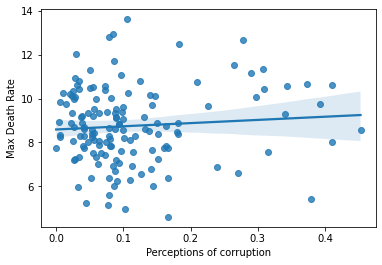

In [46]:
x = Max_Death_And_Happiness_Data['Perceptions of corruption']
y = Max_Death_And_Happiness_Data['Max Death Rate']
sns.regplot(x,np.log(y))

These results are consistent with the Covid Infection Data. The overall findings seem to be that there is a positive correlation between world happiness scores and covid death rates. It appears that the higher a country scores on the world happiness measures, the higher the covid death rate within that country. It should be noted that the correlations are not particularly strong though. 

I highly doubt that the happiness scores are a result of, or cause of, Covid infection or death rates, so I assume that they are linked by another variable. For further investigation at a later date:
    - population size
    - population density
    - vaccination rates
    - ages of the population
    - covid strategies (eg. lockdown)
    - wealth

# Thank you for reading!